<a href="https://colab.research.google.com/github/gyselle-marques/CalculoDeMetricas-DesafioDIO/blob/main/avaliacao_de_resultado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando bibliotecas necessárias

import numpy as np
import itertools
import sklearn

import matplotlib
import matplotlib.pyplot as plt

# Importando módulos e funções específicas do Scikit-learn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Instalando o XGBoost
!pip install xgboost

# Importando o XGBoost Classifier para treinamento
from xgboost import XGBClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 MB 5.3 MB/s eta 0:00:00


In [ ]:
# Generando um dataset sintético para realizar a avaliação de resultado
X, y = make_classification(
    n_samples=10000,
    n_features=25,
    n_informative=10,
    n_redundant=0,
    n_classes=5
)

# Definindo o nome das classes
class_names = ['class-1', 'class-2', 'class-3', 'class-4', 'class-5']

# Dividindo os dados em conjuntos de treinamento (67%) e teste (33%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.33  # Proporção de dados usados ​​para teste
)

# Initializando o XGBoost Classifier
clf = XGBClassifier()

# Treinamento do Classifier
clf.fit(X_train, y_train)

# Fazendo previsões sobre os dados de teste
y_pred = clf.predict(X_test)

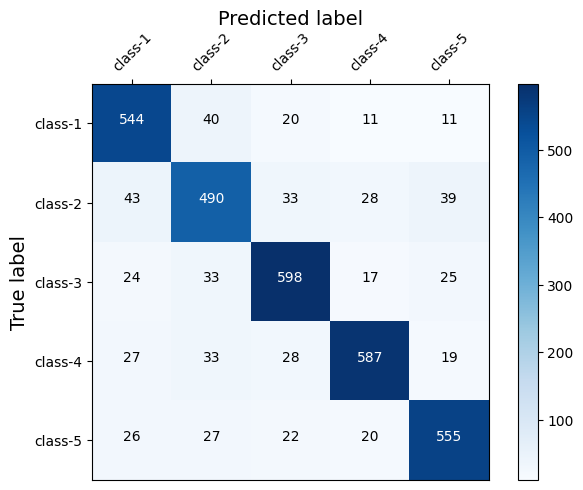

In [ ]:
# Gera a matriz de confusão
matrix = confusion_matrix(y_test, y_pred)

plt.clf()

plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# Plota a matriz de confusão com um mapa de cores azul
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

# Adiciona uma barra colorida para indicar a intensidade dos valores
plt.colorbar()

# Define o formato dos valores da matriz (formato integer)
fmt = 'd'

# Adiciona o número de previsões a cada célula da matriz
thresh = matrix.max() / 2.  # Limite para decidir a cor do texto
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    # Sobrepõe o valor em cada célula com a cor de texto apropriada
    plt.text(j, i, format(matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if matrix[i, j] > thresh else "black")

# Personalize marcas de escala e rótulos para os eixos x e y
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)  # Gira os rótulos do eixo x para facilitar a leitura
plt.yticks(tick_marks, class_names)

# Ajusta o layout do gráfico para melhor espaçamento
plt.tight_layout()

# Adiciona rótulos de eixo
plt.ylabel('True label', size=14)
plt.xlabel('Predicted label', size=14)

# Exibi a matriz de confusão
plt.show()

In [ ]:
# Obtêm os elementos da matriz de confusão para uma classe específica
def elements(class_idx):
    """
    Calculate VP, FN, FP, VN for a specific class in the existing confusion matrix.

    Parameters:
        class_idx (int): The index of the class.

    Returns:
        dict: A dictionary with VP, FN, FP, VN.
    """
    # Verdadeiro Positivo (VP):
    VP = matrix[class_idx, class_idx]

    # Falso Negativo (FN):
    FN = np.sum(matrix[class_idx, :]) - VP

    # Falso Positivo (FP):
    FP = np.sum(matrix[:, class_idx]) - VP  # Sum of the column minus VP

    # Verdadeiro Negativo (VN):
    VN = np.sum(matrix) - (VP + FN + FP)

    # Retorna os elementos da matriz de confusão como um dicionário
    return {'VP': VP, 'FN': FN, 'FP': FP, 'VN': VN}

In [ ]:
results_class1 = elements(0)
results_class2 = elements(1)
results_class3 = elements(2)
results_class4 = elements(3)
results_class5 = elements(4)

print(results_class1)
print(results_class2)
print(results_class3)
print(results_class4)
print(results_class5)

{'VP': 544, 'FN': 82, 'FP': 120, 'VN': 2554}
{'VP': 490, 'FN': 143, 'FP': 133, 'VN': 2534}
{'VP': 598, 'FN': 99, 'FP': 103, 'VN': 2500}
{'VP': 587, 'FN': 107, 'FP': 76, 'VN': 2530}
{'VP': 555, 'FN': 95, 'FP': 94, 'VN': 2556}


In [ ]:
# Função de acurácia: calcular a acurácia geral do modelo
def accuracy(y_test, y_pred):
    """
    Calculate the accuracy of the model.

    Parameters:
        y_test (array-like): The true labels.
        y_pred (array-like): The predicted labels.

    Returns:
        float: The accuracy.
    """
    # Previsões Corretas: Soma dos principais elementos diagonais da matriz de confusão
    correct_predictions = np.trace(matrix)  # Verdadeiros Positivos para todas as classes combinadas

    # Previsões totais: soma de todos os elementos da matriz de confusão
    total_predictions = np.sum(matrix)  # Número total de instâncias

    # Calcule a acurácia como a proporção de previsões corretas
    acc = correct_predictions / total_predictions

    return acc  # Retorne a precisão como um valor decimal

# Imprime o valor bruto da acurácia
print(accuracy(y_test, y_pred))

# Imprime a acurácia como uma porcentagem
print(f"accuracy: {round(accuracy(y_test, y_pred)*100)}%")

0.8406060606060606
accuracy: 84%


In [ ]:
# Função de precisão
def precision(class_idx):
    """
    Calculate the precision for a specific class.

    Parameters:
        class_idx (int): The index of the class.

    Returns:
        float: The precision.
    """
    # Obtêm os elementos VP, FP, etc. da função elements()
    metrics = elements(class_idx)

    # Acessa e extrai VP e FP do dicionário retornado da função elements()
    VP = metrics['VP']
    FP = metrics['FP']

    pr = VP/(VP+FP)
    return pr

print(f"Precision: {round(precision(2)*100)}%")

Precision: 85%


In [ ]:
# Função de sensibilidade (recall)
def recall(class_idx):
    """
    Calculate the recall for a specific class.

    Parameters:
        class_idx (int): The index of the class.

    Returns:
        float: The recall.
    """
    metrics = elements(class_idx)

    VP = metrics['VP']
    FN = metrics['FN']

    # Calcula o recall
    re = VP / (VP+FN)
    return re

print(f"Recall: {round(recall(2)*100)}%")

Recall: 86%


In [ ]:
# Função de especificidade
def specificity(class_idx):
    """
    Calculate the specificity for a specific class.

    Parameters:
        class_idx (int): The index of the class.

    Returns:
        float: The specificity.
    """
    metrics = elements(class_idx)

    FP = metrics['FP']
    VN = metrics['VN']

    # Calcula a especificidade
    spec = VN / (FP + VN)
    return spec

print(f"Specificity: {round(specificity(2)*100)}%")

Specificity: 96%


In [ ]:
# Função F-Score
# 2*(P*R)/(P+R)
def f_score(class_idx):
    """
    Calculate the F-score for a specific class.

    Parameters:
        class_idx (int): The index of the class.

    Returns:
        float: The F-score.
    """
    score = 2 * ((precision(class_idx) * recall(class_idx)) / (precision(class_idx) + recall(class_idx)))
    return score

print(f"F-Score: {round(f_score(2)*100)}%")

F-Score: 86%


In [ ]:
# Compara os resultados com o sklearn
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

     class-1       0.82      0.87      0.84       626
     class-2       0.79      0.77      0.78       633
     class-3       0.85      0.86      0.86       697
     class-4       0.89      0.85      0.87       694
     class-5       0.86      0.85      0.85       650

    accuracy                           0.84      3300
   macro avg       0.84      0.84      0.84      3300
weighted avg       0.84      0.84      0.84      3300



In [ ]:
print(f"accuracy: \n {accuracy(y_test,y_pred):.2f}")
print(f"precision: \n class-1: {precision(0):.2f} \n class-2: {precision(1):.2f}\n class-3: {precision(2):.2f}\n class-4: {precision(3):.2f}\n class-5: {precision(4):.2f}")
print(f"recall:\n class-1: {recall(0):.2f}\n class-2: {recall(1):.2f}\n class-3: {recall(2):.2f}\n class-4: {recall(3):.2f} \n class-5: {recall(4):.2f}")
print(f"specificity: \n class-1: {specificity(0):.2f}\n class-2: {specificity(1):.2f}\n class-3: {specificity(2):.2f}\n class-4: {specificity(3):.2f} \n class-5: {specificity(4):.2f}")
print(f"f_score: \n class-1: {f_score(0):.2f}\n class-2: {f_score(1):.2f}\n class-3: {f_score(2):.2f}\n class-4: {f_score(3):.2f} \n class-5: {f_score(4):.2f}")

accuracy: 
 0.84
precision: 
 class-1: 0.82 
 class-2: 0.79
 class-3: 0.85
 class-4: 0.89
 class-5: 0.86
recall:
 class-1: 0.87
 class-2: 0.77
 class-3: 0.86
 class-4: 0.85 
 class-5: 0.85
specificity: 
 class-1: 0.96
 class-2: 0.95
 class-3: 0.96
 class-4: 0.97 
 class-5: 0.96
f_score: 
 class-1: 0.84
 class-2: 0.78
 class-3: 0.86
 class-4: 0.87 
 class-5: 0.85


In [ ]:
# Calcula métricas manuais para cada classe usando funções personalizadas
manual_data = {
    'Precision': [precision(0), precision(1), precision(2), precision(3), precision(4)],
    'Recall': [recall(0), recall(1), recall(2), recall(3), recall(4)],
    'F1-Score': [f_score(0), f_score(1), f_score(2), f_score(3), f_score(4)],
}

# Importa funções necessárias do sklearn.metrics
from sklearn.metrics import precision_score, recall_score, f1_score

# Calcula métricas para cada classe usando funções integradas do sklearn
sklearn_data = {
    'Precision': precision_score(y_test, y_pred, average=None),
    'Recall': recall_score(y_test, y_pred, average=None),
    'F1-Score': f1_score(y_test, y_pred, average=None),
}

# Importa a biblioteca do pandas
import pandas as pd

# Cria um DataFrame para comparar métricas manuais e sklearn para todas as classes
comparison_df = pd.DataFrame({
    'Class': ['class-1', 'class-2', 'class-3', 'class-4', 'class-5'],
    'Manual Precision': manual_data['Precision'],
    'Sklearn Precision': sklearn_data['Precision'],
    'Manual Recall': manual_data['Recall'],
    'Sklearn Recall': sklearn_data['Recall'],
    'Manual F1-Score': manual_data['F1-Score'],
    'Sklearn F1-Score': sklearn_data['F1-Score'],
})


print(comparison_df)

     Class  Manual Precision  Sklearn Precision  Manual Recall  \
0  class-1          0.819277           0.819277       0.869010   
1  class-2          0.786517           0.786517       0.774092   
2  class-3          0.853067           0.853067       0.857963   
3  class-4          0.885370           0.885370       0.845821   
4  class-5          0.855162           0.855162       0.853846   

   Sklearn Recall  Manual F1-Score  Sklearn F1-Score  
0        0.869010         0.843411          0.843411  
1        0.774092         0.780255          0.780255  
2        0.857963         0.855508          0.855508  
3        0.845821         0.865144          0.865144  
4        0.853846         0.854503          0.854503  


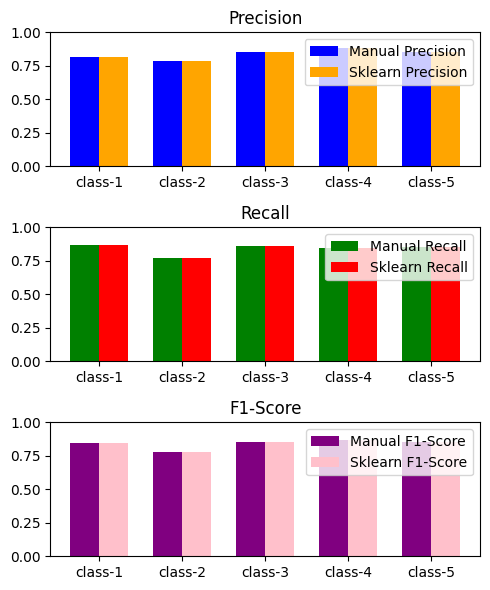

In [ ]:
# Configurar dados do gráfico
classes = comparison_df['Class']
x = np.arange(len(classes))  # Class positions
bar_width = 0.35  # Bar width

# Criar plotagem
fig, ax = plt.subplots(3, 1, figsize=(5, 6))

# Precisão
ax[0].bar(x - bar_width / 2, comparison_df['Manual Precision'], bar_width, label='Manual Precision', color='blue')
ax[0].bar(x + bar_width / 2, comparison_df['Sklearn Precision'], bar_width, label='Sklearn Precision', color='orange')
ax[0].set_title('Precision')
ax[0].set_xticks(x)
ax[0].set_xticklabels(classes)
ax[0].set_ylim(0, 1)
ax[0].legend()

# Sensibilidade/Recall
ax[1].bar(x - bar_width / 2, comparison_df['Manual Recall'], bar_width, label='Manual Recall', color='green')
ax[1].bar(x + bar_width / 2, comparison_df['Sklearn Recall'], bar_width, label='Sklearn Recall', color='red')
ax[1].set_title('Recall')
ax[1].set_xticks(x)
ax[1].set_xticklabels(classes)
ax[1].set_ylim(0, 1)
ax[1].legend()

# F1-Score
ax[2].bar(x - bar_width / 2, comparison_df['Manual F1-Score'], bar_width, label='Manual F1-Score', color='purple')
ax[2].bar(x + bar_width / 2, comparison_df['Sklearn F1-Score'], bar_width, label='Sklearn F1-Score', color='pink')
ax[2].set_title('F1-Score')
ax[2].set_xticks(x)
ax[2].set_xticklabels(classes)
ax[2].set_ylim(0, 1)
ax[2].legend()

plt.tight_layout()
plt.show()
